# Introduction to Computational Data Analysis

*This notebook was created by Martin Hurst and updated by Tobias Keller, University of Glasgow.*

In this lab you will run a simple data analysis of a time series of CO<sub>2</sub> concentration in Earth's atmosphere recorded at the [Mauna Loa Observatory](https://www.esrl.noaa.gov/gmd/obop/mlo/) on Hawaii. The Intended Learning Outcomes of this lab are:
* Understand how to plot and manipulate a data set in `Python`
* Get to know how to import and use modules in `Python`
* Familiarise yourself with important concepts in data analysis
* Examine the changing CO<sub>2</sub> concentrations in the Earth's atmosphere through time

Inside blocks of `Python` code there are comments indicated by lines that start with `#`. These lines are not computer code but rather comments providing information about what the code is doing to help you follow along. 

Work through the notebook by executing (`shift + enter`) each cell in sequence from the top. At various points you will be asked to edit or complete the code for you to learn how things are done by doing them yourself. Please ___read carefully all text instructions as well as all code and comments within___. 

Use a web search engine of your choice to look up any `Python` commands you don't understand. There's typically good documentation around.

At times the `Python` engine running the notebook in the background may get stuck. You can tell by tags to the left of code cells showing `[*]`. If that happens, select the 'restart' button (circular arrow) from the menu bar at the top of the window, or select 'Kernel -> Restart' from the menu bar above. After restarting the kernel you will need to ___execute all cells again from the top___ to continue where you left off.


## Let's get started!

We first need to tell `Python` which tools we want to use. Many useful modules have been written for `Python` users. These can be loaded at the top of a script with an `import` command. In fact, one of the reasons `Python` is such a widely adopted language is that it is quite straightforward to program and distribute additional modules with useful functionality. Here, we are going to use a few of the most frequently used ones: `numpy`, `scipy`, and `matplotlib`.

In [1]:
# import modules for numerical and statistical calculations and for plotting data
import numpy as np               # numerical functions for python
import scipy.stats as stat       # statistical functions for python
import scipy.optimize as opt     # optimisation functions for python
import matplotlib.pyplot as plt  # data plotting functions for python

# tell matplotlib to plot figures within the page rather than opening new windows
%matplotlib inline

# customise default plot style to use font size 16
from matplotlib import rcParams
rcParams['font.size'] = 16

## Access timeseries data

The time series data of mean monthly CO<sub>2</sub> concentrations recorded at Mauna Loa can be accessed on the web [here](https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html).

A recent update of the dataset will have been loaded into the folder you found this notebook in. The next cell loads the data and checks if it worked by printing a sample.

In [2]:
# load the Mauna Loa CO2 data, which is an array (table) with many columns of different data. 
# We are only using two columns, 
# the decimal date (column 2) and the monthly average CO2 concentrations (column 4),
# then unpack the results into two variables, Date and CO2

# load the dates and CO2 data into numpy arrays using the numpy function 'loadtxt'
Filename  = "./data/co2_mm_mlo.txt"
Date, CO2 = np.loadtxt(Filename, usecols=(2,4), unpack=True)

# let's print the first five values of each array to get an idea what the data looks like
print('Dates: ',Date[:5])
print('mean monthly CO2: ',CO2[:5])

Dates:  [1958.208 1958.292 1958.375 1958.458 1958.542]
mean monthly CO2:  [315.71 317.45 317.5  317.1  315.86]


Note: a numpy array is a `Python list` where all entries are numbers of the same data type (i.e., `int` or `float`)


### Plot time series of mean monthly CO<sub>2</sub>

First thing we want to do is to plot the data and see what it looks like. 

Let's create a simple line plot of the CO$_2$ data over time:

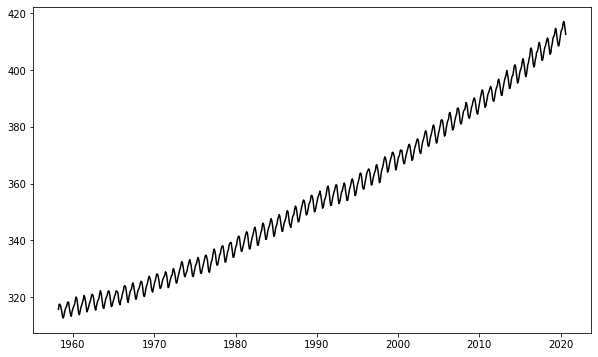

In [3]:
# prepare figure
fig1 = plt.figure(1,figsize=(10,6))  # create figure to plot in
ax1  = fig1.add_subplot(111)  # create set of axes to plot in. (111) means "plot 1 in a 1-by-1 grid of subplots"

# plot CO2 time series
ax1.plot(Date,CO2,'k-');

The plot above is one you likely have seen before in climate change lectures and in media articles about climate change. This plot is known as the "Keeling Curve" after geochemist Charles David Keeling, who designed and built the Mauna Loa CO<sub>2</sub> monitoring station in 1957 ([Harris, 2010](https://pubs.acs.org/doi/abs/10.1021/ac1001492)).

Note that we need to consider the units we are working in. Date is in [yr] (years) and CO<sub>2</sub> concentration is in [ppm] (parts per million).

The plot above shows a wiggly line, but doesn't really give us more information about what we see. Let's customise the plot a little by adding **axis labels** and a **legend**, and then **save the figure** to a file in your working folder.

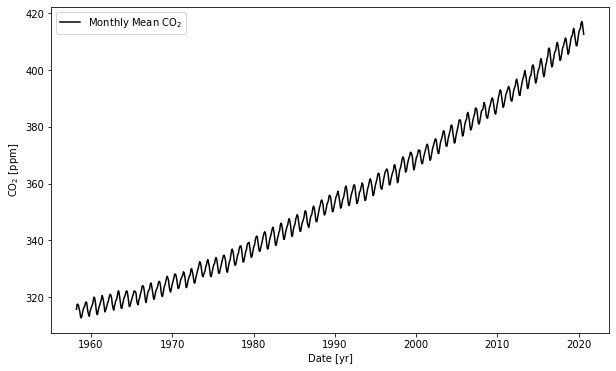

In [4]:
# prepare figure
fig1 = plt.figure(1,figsize=(10,6))  # create figure to plot in
ax1  = fig1.add_subplot(111)  # create set of axes to plot in

# plot CO2 time series
ax1.plot(Date,CO2,'k-')  
plt.xlabel("Date [yr]")  # add label on x-axis
plt.ylabel("CO$_2$ [ppm]")  # add label on y-axis

# add legend
ax1.legend(['Monthly Mean CO$_2$'])

# save figure to folder
plt.savefig("MaunaLoa_CO2_Observations.png",dpi=600)

<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK</h3>
<p> There are all sorts of ways you can customise your plots with matplotlib. Try for example the different line styles. In the plot command in the cell above you can see a string 'k-', where 'k' stands for black, and '-' stands for a solid line. 
    
Try out other combination of colours ('r', 'b', 'g', 'y', 'm', 'c'), and line or symbol styles ('--', ':', '-.', 'o', 'd', 's') in the cell below.
</p>
</font>
</div>

Let's return to the original figure we created above.

In [ ]:
# plot CO2 time series
fig1 = plt.figure(1,figsize=(10,6))  # create figure to plot in
ax1  = fig1.add_subplot(111)  # create set of axes to plot in

ax1.plot(Date,CO2,'k-')  # => change colour and style here! <=

plt.xlabel("Date [yr]")  # add label on x-axis
plt.ylabel("CO$_2$ [ppm]")  # add label on y-axis
ax1.legend(['Monthly Mean CO$_2$']);  # add legend

In this overall view of the data we cannot make out quite all the detail of the curve. Let's look at the data in more detail by changing the axis limits. This acts to zoom in on a part of the plot:

In [ ]:
# change the x and y axis scale to show seasonality
ax1.set_xlim(2000,2010)  # reset x-limits
ax1.set_ylim(360,400)    # reset y-limits
plt.savefig("MaunaLoa_CO2_Seasonal.png",dpi=600)  # save figure to folder
fig1  # call to refresh fig1

## Time Series Decomposition

A time series can be thought of as a superposition of different components of a variable's behaviour, each of which can be analysed and modelled in turn to get a full description of how the variable is changing through time. 

Often we find there is a **long-term trend** that captures the most general variation in the time series. Here, CO<sub>2</sub> concentrations are seen to gradually increase through time. 

Superposed to the long-term trend we often find some **short-term fluctuations**. Here, there is some regularity to the fluctuations about the overall increasing trend, which we can readily recognise as a **seasonality** in the data. 

The thought process of recognising the long-term trend and seasonal fluctuations in fact constitutes an act of ___conceptual modelling___. We will now translate this conceptual model into a ___machine learning model___, where we seek model curves that best fit each of these components of the data signal individually.

In combination, we can then use the calibrated or ___trained models___ for the long-term trend and seasonal fluctuations to ___predict___ atmospheric CO$_2$ concentrations into the future.

### Long-term trend

There is clearly an upward trend in the CO<sub>2</sub> concentrations through time. The simplest way to model this trend is to try and fit a straight line to the CO<sub>2</sub> concentrations. The equation for a straight line is:

$$
\begin{equation}
{Y_\ell = C_0 + C_1 X} \tag{1}
\end{equation}
$$

In this equation $X$ is time, and $Y_\ell$ is the **linear fit** to the CO$_2$ data (subscript $_\ell$ for linear), $C_0$ and $C_1$ fitting coefficients corresponding to the intercept and slope of the fitted line respectively.

To help in the following task, let's create a function that calculates a straight line using this equation.

<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK</h3>
<p> Complete the function prepared in the cell below to calculate a straight line. The only thing you need to do is to translate eq. (1) from above into code where it says 'Y = ...' . Use the input arguments ('X, C0, C1') already listed in the function definition to complete the command.
</p>
</font>
</div>

In [ ]:
# create function to calculate straight line
def line(X,C0,C1):
    Y = ...  # <== use eq. (1) and input arguments of the function to complete the command
    return Y

We can now use this function to calculate lines and plot them over the data to see how well they fit.

<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK</h3>
<p> In the cell below, explore fitting parameters by changing the values for C0 and C1. Can you identify a good fit to the data? 
    
___Hint:___ Read off the CO$_2$ level at the beginning of the record to set $C_0$, try to estimate the slope by checking how much CO$_2$ goes up over a decade, and divide that number by 10 to set $C_1$.

Write down your best-fit coefficients for later!
</p>
</font>
</div>

In [ ]:
# set fitting coefficients
C0     = 300  # <== try different numbers to improve fit
C1     = 1    # <== try different numbers to improve fit

# shift time axis so that origin is at earliest recorded date
X      = Date-Date[0];

# calculate linear fit
CO2_lt = line(X,C0,C1)

# plot CO2 time series with linear fit
fig1 = plt.figure(1,figsize=(10,6))  # create figure to plot in
ax1  = fig1.add_subplot(111)  # create set of axes to plot in
ax1.plot(Date,CO2   ,'k-')  # plot data on original time axis
ax1.plot(Date,CO2_lt,'r-')  # plot linear fit over data
plt.xlabel("Date [yr]")  # add label on x-axis
plt.ylabel("CO$_2$ [ppm]")  # add label on y-axis
ax1.legend(['Monthly Mean CO$_2$','linear fit']);

Did you manage to produce a nice fit? The activity you just engaged in is a basic example of what could be achieved by ___machine learning___. It can, of course, get much more sophisticated than this, but the principle is simple: in machine learning you seek to analyse data to understand relationships, correlations, or trends it reveals.

You may have noticed that it's tedious work to manually optimise the fitting parameters to try and optimise. You can also not really be sure if you've truly found the optimal fit just by looking at a plot.

Luckily, the statistics module we loaded above has a suitable tool we can use. ___Linear regression___ is a statistical technique which automatically identifies the best-fitting line to the data. So let's run it and print the results to screen:

In [ ]:
# perform linear regression and report results
C1, C0, r_value, p_value, std_err = stat.linregress(X,CO2)

# recalculate linear fit with optimised coefficients
CO2_l = line(X,C0,C1)

# report regression results
print("C0  = ", C0)           # intercept
print("C1  = ", C1)           # slope
print("R^2 = ", r_value**2.)  # R2-value: goodness of the fit (1 is best)
print("p   = ", p_value)      # p-value: statistical significance of the fit (0 is best)

Now we can plot the results of our regression, label the regression line and add our equation and R$^2$ value:

In [ ]:
# make a string of the equation to use as legend
eq1 = "$Y_{lt}=$"+'{0:.2f}'.format(C0)+" + "+'{0:.2f}'.format(C1)+"$ X$"

fig1 = plt.figure(1,figsize=(10,6))  # create figure to plot in
ax1  = fig1.add_subplot(111)  # create set of axes to plot in
ax1.plot(Date,CO2  ,'k-')  
ax1.plot(Date,CO2_l,'r-') 
plt.xlabel("Date [yr]")  # add label on x-axis
plt.ylabel("CO$_2$ [ppm]")  # add label on y-axis

# add R2 and p value
ax1.text(2000,310,"R$^2$ = "+'{0:.3f}'.format(r_value**2.)+", $p=$ "+'{0:.3f}'.format(p_value),color="r")

# add the legend
ax1.legend(['Monthly Mean CO$_2$',eq1])

# save output
fig1.savefig("MaunaLoa_CO2_LinearFit.png",dpi=600)

The $R^2$ value indicates the linear fit explains 97.7% of the variance in CO<sub>2</sub> concentrations through time, and the low p-value shows the result is highly significant. Not bad! If you look at the equation, it suggests that CO$_2$ concentrations have started out near 300 ppm in the late 50's and have been growing by $\sim$1.6 ppm per year since.

We will now plot the ___residuals, which are the differences between the observations and the model fit___, to evaluate how consistently our linear model fits the data.

In [ ]:
# calculate the residuals by taking the difference between observations and model fit
CO2_res_l = CO2 - CO2_l

# create a plot of linear residuals over time
fig2 = plt.figure(2,figsize=(10,6))
ax2  = fig2.add_subplot(111)
ax2.plot(Date,CO2_res_l,'ko')
plt.xlabel("Date [yr]")
plt.ylabel("CO$_2$ Residuals [ppm]")
plt.tight_layout()
fig2.savefig("MaunaLoa_CO2_LinearResiduals.png", dpi=600)

The residuals clearly show some consistent structure. In statistics that is called *heteroscedasticity* (I dare you to try pronouncing that!). It is usually a good indicator that the model fit can still be improved. 

The fact that the residuals describe a consistent curve over time indicats that perhaps a straight line won't do, and instead we can try fitting a non-linear curve to the data. Specifically, we will try a **quadratic** model with a third fitting coefficient, $C_2$:

$$
\begin{equation}
{Y_{q} = C_0 + C_1 X + C_2 X^2} \ , \tag{2}
\end{equation}
$$

where $Y_{q}$ now stands for quadratic trend. To do this we will use a *polynomial regression*, rather than linear regression function. `Numpy` has the `polyfit` tool do this. We will need to tell it that the order of the polynomial is 2 (i.e. X$^2$ is the largest power in the equation):

In [ ]:
# try a 2nd order polynomial fit instead
coefs = np.polyfit(X,CO2,2)  # identify best-fit coefficients
qfit  = np.poly1d(coefs)     # prepare a function to evaluate the quadratic fit
CO2_q = qfit(X)              # evaluate the quadratic fit

print("C0 = ",coefs[2])
print("C1 = ",coefs[1])
print("C2 = ",coefs[0])

Annoyingly, this function doesnt calculate an R$^2$- or p-value to statistically evaluate the model fit for us, but we can do that ourselves. We need to first calculate the residuals.

<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK</h3>
<p> You will recall from above that the residuals are the difference between model prediction and observed data. In the cell below, fill in the formula to calculate the residuals of the quadratic model fit!
</p>
</font>
</div>

In [ ]:
# calculate the residuals by taking the difference between observations and model fit
CO2_res_q = ...  # <== fill in the formula (hint: check how we did it for the linear fit two cells up) 

The R$^2$ coefficient is calculated from the sum of squares of the residuals normalised by the sum of squared differences between the observations and their mean. Roughly translated the $R^2$ value tells us how much of the variance in the original data is explained by the trained model.

We can also obtain a p-value from a so-called *chi-square test*. Don't worry about the details, here's how to calculate these:

In [ ]:
# calculate sum of squared differences relative to the mean
SS_obs = np.sum((CO2-np.mean(CO2))**2.)

# calculate sum of squared residuals
SS_res = np.sum(CO2_res_q**2.)

# calculate R2 value
R_2 = 1-(SS_res/SS_obs)

# do chi-squared test to check significance of relationship
chi_sq, p_value = stat.chisquare(CO2,qfit(X))
p_value         = 1-p_value

print("R^2 = ", R_2)
print("p   = ",p_value)

The $R^2$ value indicates that our quadratic fit now explains 99.4% of the variance of observations. That's a great fit! 

Now we can plot our new model fit on the graph from above and report the equation and $R^2$:

In [ ]:
# make a string of the equation
eq2 = "$Y_{lt}=$"+'{0:.2f}'.format(coefs[2])+" + "+'{0:.2f}'.format(coefs[1])+"$ X + $"+'{0:.3f}'.format(coefs[0])+"${X}^2$"

# plot the result
fig1 = plt.figure(1,figsize=(10,6))
ax1  = fig1.add_subplot(111)
ax1.plot(Date, CO2  ,'k-',label='Data')            
ax1.plot(Date, CO2_l,'r-',label=eq1)            
ax1.plot(Date, CO2_q,'b-',label=eq2)            
plt.xlabel("Date [yr]")  # add label on x-axis
plt.ylabel("CO$_2$ [ppm]")  # add label on y-axis

ax1.text(2000,320,"$R^2$ = "+'{0:.2f}'.format(R_2)+", $p =$"+'{0:.3f}'.format(p_value), color="b")

# add the legend
ax1.legend()

# save figure
fig1.savefig("MaunaLoa_CO2_QuadraticFit.png", dpi=600)

This looks to be doing a much better job of representing the trend in CO<sub>2</sub> concentrations. 

<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK</h3>
<p> Let's visually check the residuals again. In the cell below, fill in the code needed to plot the residuals of the quadratic model fit model! Do it using the same style as we did for the linear model residuals above.
</p>
</font>
</div>

In [ ]:
# create a plot of quadratic residuals over time (hint: check how we plotted linear residuals above)

fig2.savefig("MaunaLoa_CO2_QuadraticResiduals.png", dpi=600)

That looks like a big improvement! But the residuals still span $\pm$4 ppm variations in concentration, so our model clearly does not yet explain all the variance of the data.

## Filtering

An alternative approach to identifying the long-term trend component in a timeseries is to run a filter across the data. A filter acts to smooth out short-term variability and noise and hence to isolate the trend. 

The advantage of a filter is that it makes no *a priori* assumptions about the nature of the trend (e.g. linear, quadratic, etc.). The disadvantage is that it cannot describe the trend by a mathematical equation; hence it cannot be extrapolated to make future predictions.

The simplest form of filter is a moving average. At each point in the timeseries, a moving average filter takes an average $\bar{Y}$ of all the nearby values $Y$ within a defined time window. 

In the cell below we will define a function that calculates the moving average, execute the cell and then move on to the next task.

In [ ]:
# create moving average filter
def mov_avg(y,x,w):
    N       = int(w*12)                             # round time window to nearest number of months
    cumsum  = np.cumsum(np.insert(y, 0, 0))         # calculate cumulative sum of data within window
    mov_avg = (cumsum[N:] - cumsum[:-N]) / float(N) # calculate moving average at each point
    x       = x[int(N/2):-int(N/2)+1]               # trim x to same length as mov_avg
    return mov_avg, x

<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK</h3>
<p> Explore the effect of window size on the degree of filtering by changing the size of the moving average window in the code cell above. Try a few values for 'window' in the cell below, for example 0.5, 1, 2, 4.
</p>
</font>
</div>

In [ ]:
# apply moving average filter and test different window sizes
window = 2  # <== try different values here
CO2_flt, Date_flt = mov_avg(CO2,Date,window)

fig3 = plt.figure(3,figsize=(10,6))
ax3  = fig3.add_subplot(111)
ax3.plot(Date    ,CO2    ,'k-',label="Mean Monthly CO$_2$")
ax3.plot(Date_flt,CO2_flt,'r-',lw=2,label="Moving Average")
plt.xlabel("Date [yr]")
plt.ylabel("CO$_2$ [ppm]")
ax3.legend()
fig3.savefig("MaunaLoa_CO2_MovingAverage.png", dpi=600)

## Seasonality

Now that we have identified and modelled a trend line, we can explore the seasonal signal in the residuals. We begin doing so by plotting the residuals of the filtered trend line. 

In [ ]:
# get moving average CO2 trend, window of 1 year
window    = 1
CO2_flt, Date_flt = mov_avg(CO2,Date,window)

# crop unfiltered to same size as filtered data
N         = int(window*12)
CO2_unflt = CO2[int(N/2):-int(N/2)+1]  

# get seasonal CO2 residual
CO2_ssnl  = CO2_unflt - CO2_flt

# plot the time series
fig4 = plt.figure(4,figsize=(12,4))
ax4  = fig4.add_subplot(111)
ax4.plot(Date_flt,CO2_ssnl,'k-')
plt.xlabel("Date [yr]")
plt.ylabel("Seasonal CO$_2$ [ppm]")
plt.tight_layout()
plt.savefig("MaunaLoa_CO2_Seasonal.png",dpi=600)

Let's zoom in to the past decade to see the seasonal pattern more clearly.

In [ ]:
ax4.set_xlim(2010,2020)
fig4

To model the seasonal signal we will use a harmonic function; here, a sine wave. The mathematical equation for a sine wave is:

$$
\begin{equation}
{Y_s = A\:\sin\:(\:f\:X_t + \phi) + D}
\end{equation}
$$

where $A$ is the amplitude of the wave, $f$ is the wave frequency, $\phi$ is the phase (where in the cycle of one wavelength the signal starts), and $D$ is the offset. 

We can fit a seasonal signal to the decomposed data by fitting a sine wave of this form to the data using a *least squares optimisation routine*. Without going into the details, such a routine identifies the fitting parameters that minimise the sum of squares of residuals between the trained model and training data.

In [ ]:
# create a function that calculates the residuals between a sine-wave function and the seasonal data 
# this will be used as the objective function to be minimised in the optimisation below
optimize_func = lambda x: x[0] * np.sin(x[1] * 2*np.pi/12 * Date_flt + x[2]) + x[3] - CO2_ssnl

# take an initial guess at the parameters by examining the seasonality plot
guess_offset = 0.   # guess variation around zero
guess_amp    = 3.   # guess +/- 3 ppm amplitude
guess_freq   = 12.  # guess length of seasonal cycle in months
guess_phase  = 0.   # difficult to guess, start with zero

# run the least squared analysis to optimise and report result
opt_amp, opt_freq, opt_phase, opt_offset = opt.leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_offset])[0]
print("optimised offset    =",opt_offset)
print("optimised amplitude =",opt_amp)
print("optimised frequency =",opt_freq)
print("optimised phase     =",opt_phase)

# evaluate the trained model for Date_flt using the optimised parameters
CO2_sine = opt_offset + opt_amp*np.sin(opt_freq*2*np.pi/12 * Date_flt + opt_phase)

ax4.plot(Date_flt,CO2_sine,'r--')
fig4.savefig("MaunaLoa_CO2_SineFit.png",dpi=600)
fig4

## Noise

The remaining residuals between the decomposed seasonal data and the sine wave model fit are the last unexplained component of our timeseries. This may still contain some meaningful signal, but at this stage we will simply interpret them as "measurement noise". Let's plot the noise and see what we have left:

In [ ]:
# get residuals from seasonal signal
CO2_noise = CO2_ssnl - CO2_sine

# plot residuals
fig5 = plt.figure(5,figsize=(10,6))
ax5  = fig5.add_subplot(111)
ax5.plot(Date_flt,CO2_noise,'ko')
plt.xlabel("Date [yr]")
plt.ylabel("Residual CO$_2$ [ppm]")
plt.tight_layout()
plt.savefig("MaunaLoa_CO2_Noise.png",dpi=600)

## Final decomposition

Now that we have identified reasonable models for both long-term trend and seasonal variation, we can plot all the components of our data analysis together:

In [ ]:
# Create decomposition plot
fig10 = plt.figure(10,figsize=(10,15))

# plot data
ax10a = fig10.add_subplot(411)
ax10a.plot(Date,CO2,'k-')
ax10a.set_ylabel("CO$_2$ [ppm]")
ax10a.xaxis.set_ticklabels([])
ax10a.legend(["Raw Data"])

#plot quadratic trend
ax10b = fig10.add_subplot(412)
ax10b.plot(Date_flt,CO2_flt,'k-')
ax10b.plot(Date,CO2_q,'r-')
ax10b.set_ylabel("CO$_2$ [ppm]")
ax10b.xaxis.set_ticklabels([])
ax10b.legend(["Moving Average (1 year)","Quadratic Fit"])

#plot seasonal variations
ax10c = fig10.add_subplot(413)
ax10c.plot(Date_flt,CO2_sine,'k-')
ax10c.set_ylabel("CO$_2$ [ppm]")
ax10c.xaxis.set_ticklabels([])
ax10c.set_ylim(-5,5)
ax10c.legend(["Seasonal Variations"])

#plot noise
ax10d = fig10.add_subplot(414)
ax10d.plot(Date_flt,CO2_noise,'k-')
ax10d.set_ylabel("CO$_2$ [ppm]")
ax10d.legend(["Residuals / Noise"])
plt.xlabel("Date [yr]")

plt.tight_layout()
plt.savefig("MaunaLoa_CO2_Decomposition.png",dpi=600)

## Prediction

With the calibrated model we trained above, we can now dare to predict CO$_2$ concentrations going forward into the future. 

To that end, we will create a new timeline that takes us all the way to the year 2100, and use the quadratic and sine-wave fitting function from above to calculate how CO$_2$ concentrations might evolve if everything keeps evolving as within the observation period.

<div class="alert alert-block alert-info">
<font color="black">
<h3>TASK</h3>
<p> Find the appropriate lines of code above where we evaluated the quadratic and sine-wave components of the fitted model and copy the formulas down into the cell below where indicated! Make sure they are now evaluated for the extended prediction timeline. Plot the predicted $CO_2$ curve together with the original data. What do you think?
    
Share the figure with your preditiction on [this Padlet link](https://padlet.com/tobiaskeller/5p8wa3lwqkvd8pht) and let us know what comes to mind when you see the result!
</p>
</font>
</div>

In [ ]:
# create a new time axis for prediction
Date_pred = np.arange(1957,2100,0.1)  # prediction interval from 1857 to 2100
X_pred    = Date_pred-Date[0]  # prediction interval shifted to start at zero

# add up the modelled long-term trend and seasonal variations
CO2_pred  = ...  # <== fill in formula for best-fit quadratic model (copy from above, evaluate for X_pred)
CO2_pred += ...  # <== fill in formula for best-fit sine-wave model (copy from above, evaluate for Date_pred)

# plot the result and customise the figure (choose line style, add axis labels, title, and legend)

plt.savefig("MaunaLoa_CO2_Prediction.png",dpi=600)